<a href="https://colab.research.google.com/github/CaioVArruda/Machinelearning/blob/main/Machine_learning_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Projeto de Machine Learning end -to- end

Vamos elaborar um modelo de machine learning capaz de prever o valor que deve ser cobrado de aluguel de um dado imóvel considerando as suas características, como localização, quantidade de cômodos entre outros detalhes.

Para isso deveremos passar por diversas etapas começando pela exploração dos dados (EDA), tentando identificar as principais características que deverão ser levadas em contas. Depois aplicaremos a engenharia de features, construção do modelo e exportação do modelo para deploy na rede.

In [ ]:
# Vamos criar um projeto de machine learning para verificar o preço de imóveis baseado em dados de padrões recorrentes em casas com características parecidas
# Vamos usar os dados da house_data
# Importando as bibliotecas mais importantes 
import pandas as pd
import numpy as np

# bibliotecas graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração Pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração Matplolib
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')

###**Exploração dos dados**

Aqui vamos tentar responder a seguinte pergunta:

Quanto vale o aluguel da casa se morasse em SP?

In [ ]:
# Lendo os dados
Base_dados = pd.read_csv('/content/house_data.csv')

#Dimensão
Base_dados.shape

(10692, 13)

In [ ]:
# Verificar
Base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
# Vamos remover algumas colunas que não faz sentido para esse projeto como fire_insurance e total
Base_dados.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace=True)



In [ ]:
# Verificar
Base_dados.shape

(10692, 11)

In [ ]:
# Vamos verificar valores nulos na nossa base de dados
Base_dados.isnull().sum().sort_values(ascending=False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [ ]:
# Campos únicos na nossa df
Base_dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [ ]:
# Tipos de colunas
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [ ]:
# Tipo de colunas
Base_dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

**Exploração analítica (EDA)**

In [ ]:
# Filtrar os tipos de colunas
colunas_categoricas = Base_dados.columns[Base_dados.dtypes == object]
colunas_numericas = Base_dados.columns[Base_dados.dtypes != object]

colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [ ]:
# Fotografia das coisas
# Dados -> 90% aceita animal | próx semestre 50% aceita animal
# Análise dos campos objetos
Base_dados['city'].value_counts(normalize=True) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [ ]:
# Quero isso para todas a minhas colunas categóricas, vamor criar um loop
for Coluna in colunas_categoricas:

  #fazendo análise
  Analise = Base_dados[Coluna].value_counts(normalize=True) * 100

  # Mostrando
  print(Coluna, '\n', Analise, '\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [ ]:
# Corrigindo os dados
# AJUstando o andar
Base_dados.loc[Base_dados['floor'] == '301']
Base_dados.iloc[2562, 5] = 30

In [ ]:
# Ajustando o traço da primeira linha
Base_dados['floor'] = Base_dados['floor'].apply(lambda Registro: 0 if Registro == '-' else Registro)
Base_dados['floor'] = pd.to_numeric(Base_dados['floor'])

#Verificando
Base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [ ]:
Base_dados['floor'].value_counts(normalize=True)

0     0.230172
1     0.101104
2     0.092125
3     0.087074
4     0.069959
5     0.056117
6     0.050412
7     0.046483
8     0.045829
9     0.034512
10    0.033389
11    0.028339
12    0.024037
13    0.018706
14    0.015900
15    0.013749
16    0.010195
17    0.008979
18    0.007015
19    0.004957
20    0.004115
21    0.003928
25    0.002338
23    0.002338
22    0.002245
26    0.001871
24    0.001777
27    0.000748
28    0.000561
29    0.000468
32    0.000187
35    0.000094
46    0.000094
30    0.000094
51    0.000094
Name: floor, dtype: float64

In [ ]:
len(colunas_numericas)

7

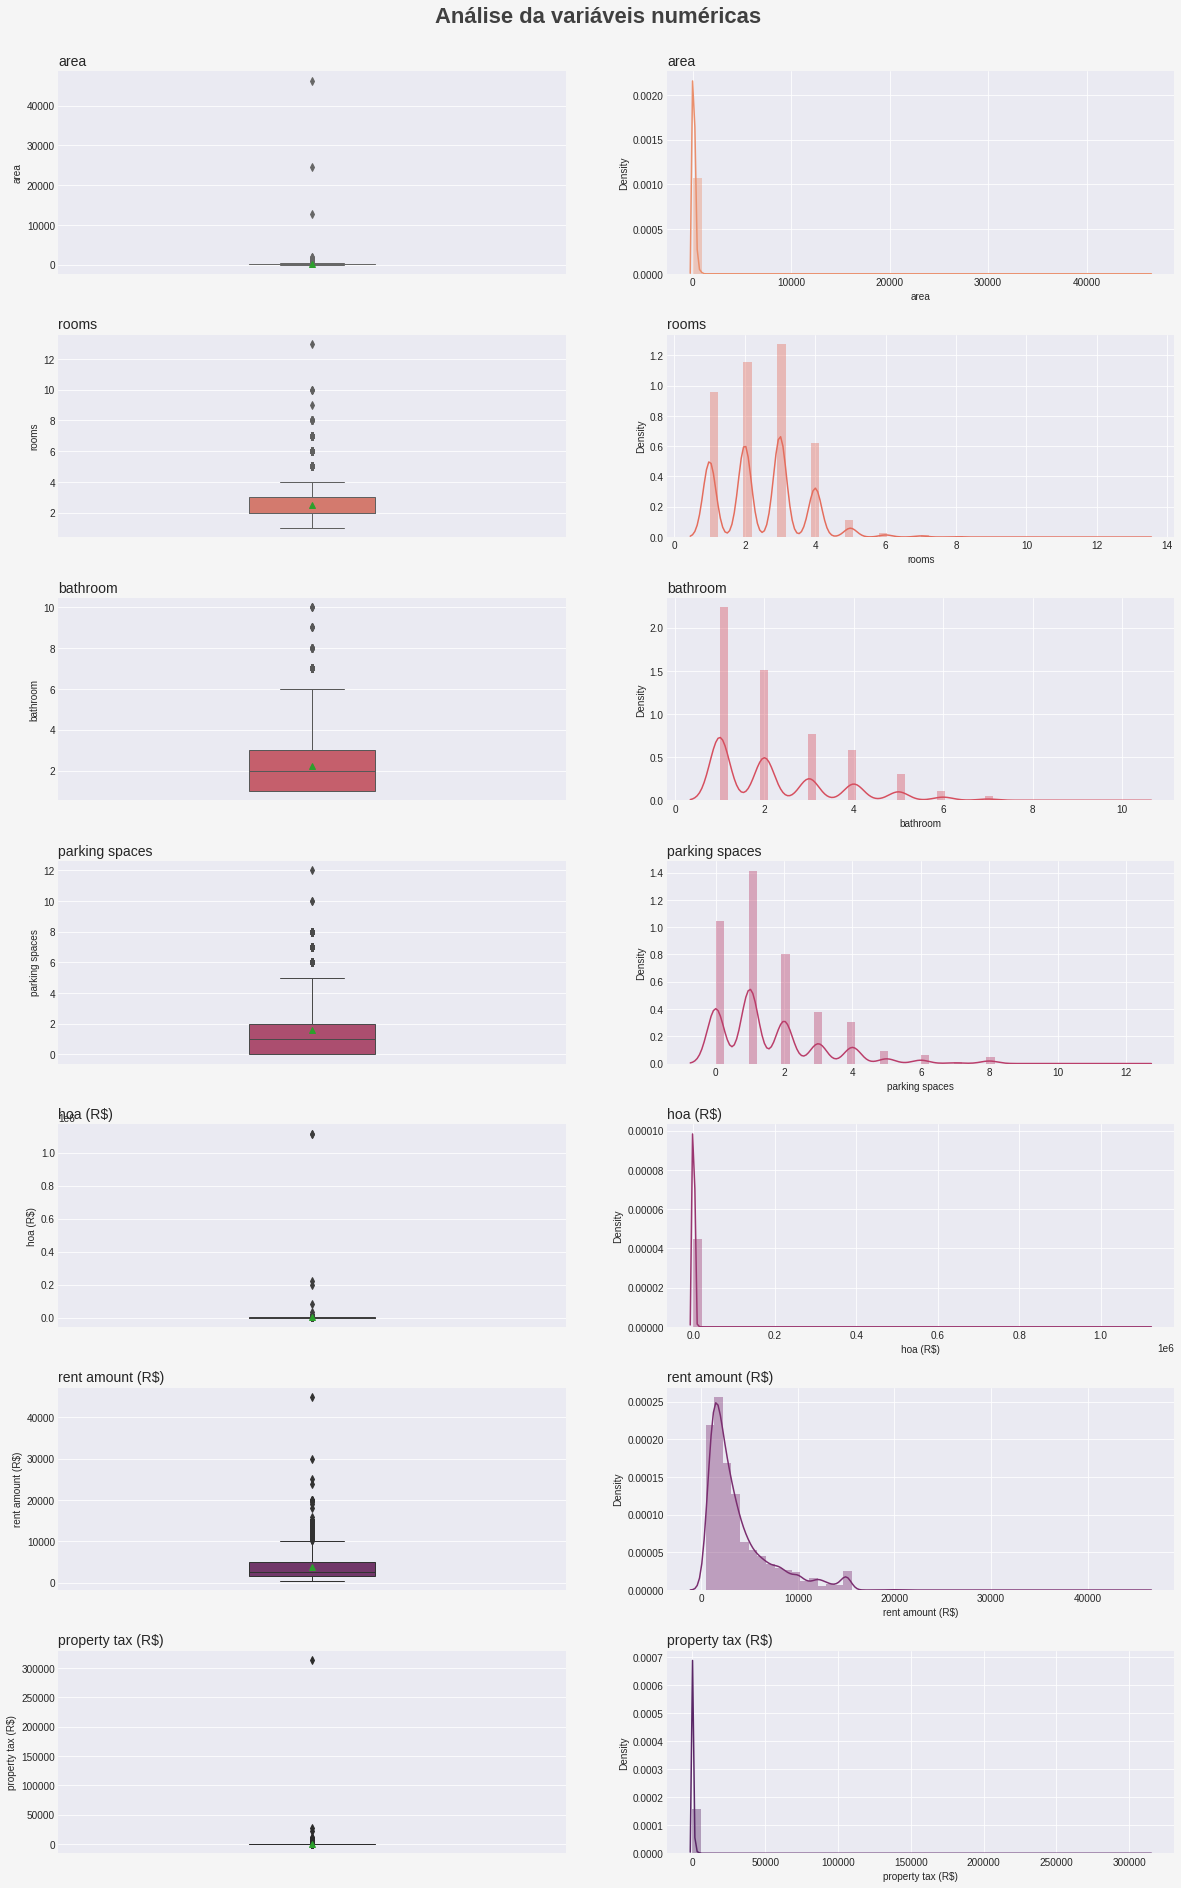

In [ ]:
# Grid com o gráficos

#Tamanho
Figura, Eixo = plt.subplots(figsize=(20,30))

# cor de fundo
Cor_fundo = '#f5f5f5'
Figura.set_facecolor(Cor_fundo)

# Paleta de cores
Paleta_cores = sns.color_palette('flare', len(colunas_numericas) * 2)

# Título
plt.suptitle('Análise da variáveis numéricas', fontsize=22, color='#404040', fontweight=600)

# Estrutura
linhas = 7 #(Todas as infos numéricas)
Colunas = 2 #(Boxplot-Displot)
Posicao = 1 #Posicao inicial do grid

for Coluna in colunas_numericas:

  #Plot no grid -- Boxplot
  plt.subplot(linhas, Colunas, Posicao)

  # Título
  plt.title(f'{Coluna}', loc='left', fontsize=14, fontweight=200)

  # Plot
  sns.boxplot(data=Base_dados, y=Coluna, showmeans=True,
              saturation=0.75, linewidth=1, color=Paleta_cores[Posicao], width=0.25)

  #Mudar
  Posicao += 1

  #Plot no Grid -- Displot
  plt.subplot(linhas, Colunas, Posicao)

   # Título
  plt.title(f'{Coluna}', loc='left', fontsize=14, fontweight=200)

  # Plot
  sns.distplot( Base_dados[Coluna], color=Paleta_cores[Posicao - 1] )

  # Mudar
  Posicao += 1

# Ajuste do grida
plt.subplots_adjust( top=0.95, hspace=0.3)

In [ ]:
Base_dados.loc[Base_dados['area'] <= 10000]['area']. describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [ ]:
Base_dados.loc[Base_dados['hoa (R$)'] <= 10000]['hoa (R$)']. describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [ ]:
Base_dados['hoa (R$)'].sort_values(ascending=False).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [ ]:
Base_dados.iloc[1213]

city                     São Paulo
area                           850
rooms                            6
bathroom                         7
parking spaces                   4
floor                            0
animal                   not acept
furniture            not furnished
hoa (R$)                     15000
rent amount (R$)             13000
property tax (R$)             2465
Name: 1213, dtype: object

In [ ]:
Base_dados['rent amount (R$)'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [ ]:
Base_dados['rent amount (R$)'].sort_values(ascending=False).head(20)

2182     45000
7748     30000
6947     25000
2619     24000
1743     20000
2859     20000
1253     20000
5525     20000
157      20000
6185     19500
2521     19000
5741     18000
6118     16000
2647     15000
8680     15000
10265    15000
1276     15000
10283    15000
1862     15000
4224     15000
Name: rent amount (R$), dtype: int64

In [ ]:
Base_dados.loc[Base_dados['rent amount (R$)'] <= 40000]['rent amount (R$)']. describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: rent amount (R$), dtype: float64

In [ ]:
Base_dados['property tax (R$)'].sort_values(ascending=False).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: property tax (R$), dtype: int64

In [ ]:
Base_dados.iloc[6645]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

### ** Engenharia de Features**

In [ ]:
# Ajuste das colunas categóricas
Base_dados['animal'] = Base_dados['animal'].map( {'acept':1, 'not acept':0})
Base_dados['furniture'] = Base_dados['furniture'].map({'furnished':1, 'not furnished':0})

# Filtrar a cidade de São Paulo
Filtro_sp = Base_dados.loc[Base_dados['city'] == 'São Paulo']

#verificar
Filtro_sp.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [ ]:
# Retirando a coluna city
Filtro_sp.drop(columns=['city'], inplace=True)

In [ ]:
# Separar os dados
Caracteristicas = Filtro_sp.drop( columns=['rent amount (R$)'])
Previsor = Filtro_sp['rent amount (R$)']

# Verificar
Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [ ]:
# Caracteristicas
Caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [ ]:
# Previsor
Previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [ ]:
# Correlação
Filtro_sp.corr()

# Próximo de 1 correlação positiva [Ambas sobem]
# Próximo de -1 correlação negativa [Uma sobe outra desce]

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


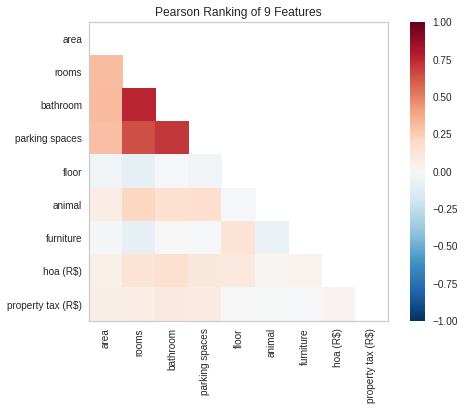

In [ ]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o método dessa avaliação
correlacao = Rank2D(algoritmo='pearson')

# Fitar essa função
correlacao.fit(Caracteristicas, Previsor)
correlacao.transform(Caracteristicas)
correlacao.show();

In [ ]:
# Separar os dados
from sklearn.model_selection import train_test_split

# Divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Caracteristicas, Previsor, test_size=0.2, random_state=10
)

print(f'Dados de treino: {x_treino.shape[0]}')
print(f'Dados de treino: {x_teste.shape[0]}')

Dados de treino: 4709
Dados de treino: 1178


In [ ]:
# Features mais relevantes
from sklearn.feature_selection import mutual_info_regression #verifica a dependencia das caracteristica
from sklearn.feature_selection import SelectKBest # seleciona as melhores features

# Seleção de features
def Selecao_features(x_treino, y_treino):

  # Configurar as nossas features
  Selecao = SelectKBest(score_func=mutual_info_regression, k='all')

  # Fitar o aprendizado
  Selecao.fit(x_treino, y_treino)

  return Selecao

#Aplicar a função
Scores = Selecao_features(x_treino, y_treino)

# Analisar
for Posicao, Score in enumerate(Scores.scores_):
  print(f'{x_treino.columns[Posicao]} : {Score}')

area : 0.06733981357454732
rooms : 0.25711676422867846
bathroom : 0.3032216624972799
parking spaces : 0.23536867649612425
floor : 0.03301999395269739
animal : 0.025725886291093847
furniture : 0.03583567774184404
hoa (R$) : 0.04460854399996972
property tax (R$) : 0.1529461833366459


### ** Construção do Modelo**

In [ ]:
# Modelo Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Instanciar o nosso modelo
Modelo_floresta = RandomForestRegressor(max_depth=5)

# Fitar o modelo
Modelo_floresta.fit(x_treino, y_treino)


RandomForestRegressor(max_depth=5)

In [ ]:
# Avaliar a performance desse modelo
Previsoes = Modelo_floresta.predict(x_teste)

# Funcao para avaliar
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Avaliando o modelo
print(f'RMSE: {sqrt(mean_squared_error(y_teste, Previsoes))}')
print(f'Score: {r2_score(y_teste, Previsoes)}')

RMSE: 2452.387254483168
Score: 0.5647189315980736


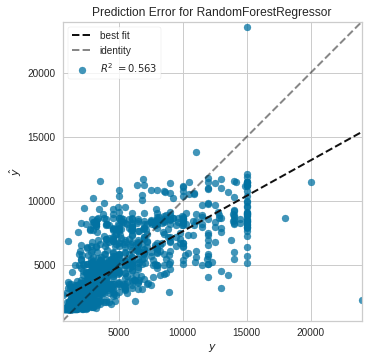

In [ ]:
# Avaliando yellowbrick
from yellowbrick.regressor import PredictionError

# Instanciar
Modelo = RandomForestRegressor(max_depth=5)
Erro_Modelo = PredictionError(Modelo)

# Fitar
Erro_Modelo.fit(x_treino, y_treino)
Erro_Modelo.score(x_teste, y_teste)
Erro_Modelo.show();

### ** Exportação**

In [ ]:
# Exportando o modelo
import joblib

# Função
joblib.dump(Modelo_floresta, 'Modelo floresta aleatória_v100.pkl')

['Modelo floresta aleatória_v100.pkl']

In [ ]:
# Testando o modelo treinado
Funcao_modelo_carregado = joblib.load('Modelo floresta aleatória_v100.pkl')

In [ ]:
Funcao_modelo_carregado.predict(x_teste.head(1).values)


array([1535.72423191])

In [ ]:
x_teste.head(1).values

array([[25,  1,  1,  0,  0,  0,  0,  0, 84]])